# DSCI-235-Project

Baseball is known for its plethora of data to be analyzed within the game. At the center of that is Statcast. A tracking system that collects data on several data points during a Major League Baseball game. The data set I chose for this project is a publically accessable Statcast data set from every pitch during the 2021 MLB season. The data include over 700,000 rows with over 35 variables describing the data. These variabes range from how fast each pitch was thrown to how fast the ball was hit off the bat, if it was hit on that pitch.  A description of all variables I will use can be found at: https://baseballsavant.mlb.com/csv-docs

------
Questions I intend to answer with this data set.
1. Which team has the highest/lowest average fastball pitch speed from their pitchers?
2. Which team has the highest/lowest average hit speed from their hitters?
3. Which team has "unluckiest" hitters? 
4. Do right handed or left handed batters get shifted upon more often? 
5. Do teams tend to score more runs while playing at home or away?




In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%autosave 60

Autosaving every 60 seconds


In [193]:
df = pd.read_csv('/baseball.csv')
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_y,release_pos_z,events,description,stand,p_throws,...,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,babip_value,post_away_score,post_home_score,if_fielding_alignment,of_fielding_alignment,delta_home_win_exp,delta_run_exp
0,FF,4/5/2021,93.2,0.84,0.84,5.74,strikeout,swinging_strike,L,L,...,NaN,NaN,0.0,0.0,2,0,Infield shift,Standard,-0.014,-0.134
1,SL,4/5/2021,82.9,1.03,1.03,5.69,NaN,foul,L,L,...,NaN,NaN,NaN,NaN,2,0,Infield shift,Standard,0.000,0.000
2,FF,4/5/2021,94.6,-1.85,-1.85,5.77,caught_stealing_3b,ball,R,R,...,NaN,NaN,0.0,0.0,4,0,Standard,Standard,0.014,-0.261
3,FF,4/5/2021,93.6,0.60,0.60,5.85,NaN,ball,L,L,...,NaN,NaN,NaN,NaN,2,0,Infield shift,Standard,0.000,0.043
4,FF,4/5/2021,97.1,1.86,1.86,6.57,field_out,hit_into_play,R,L,...,0.277,0.261,0.0,0.0,6,0,Standard,Standard,-0.007,-0.264


## Question 1: Which team has the highest/lowest average fastball pitch speed from their pitchers?

In the dataset, we have home and away team and what inning the pitch is thrown in. We can determine the team the pitcher is on from these variables. If the pitch is thrown in the top of the inning, the home teams pitcher is throwing the ball. If the ball is thrown in the bottom of an inning, the away team pitcher is throwing. To find the average fastball, we need to use the pitch type  column. However, there are different kinds of fastballs labeled 'FF', 'SI', and 'FA'. I will relabel all pitches to be easier to understand.

In [195]:
# Create new column for pitcher team
df['pitcher_team'] = np.where(df['inning_topbot'] == 'Top', df['home_team'], df['away_team'])

df['pitch_type1'] = np.where((df['pitch_type'] == 'FF') | (df['pitch_type'] == 'SI') | (df['pitch_type'] == 'FA'), 'Fastball',
                            np.where((df['pitch_type'] == 'CH'), 'Changeup',
                                     np.where((df['pitch_type'] == 'CS') | (df['pitch_type'] == 'CU') | (df['pitch_type'] == 'SC') | 
                                              (df['pitch_type'] == 'KC'), 'Curveball',
                                              np.where((df['pitch_type'] == 'EP'), 'Eephus',
                                                       np.where((df['pitch_type'] == 'KN'), 'Knuckleball',
                                                                np.where((df['pitch_type'] == 'SL'), 'Slider', 
                                                                         np.where((df['pitch_type'] == 'FS'), 'Splitter',"Unidentified")))))))
# Group by each team
df[df['pitch_type1'] == "Fastball"].groupby(['pitch_type1','pitcher_team'])['release_speed'].mean().sort_values(ascending = False)


pitch_type1  pitcher_team
Fastball     NYY             94.689674
             CWS             94.620833
             LAD             94.423728
             BOS             94.412111
             COL             94.256357
             PHI             94.218120
             CIN             94.190790
             ATL             94.170522
             DET             94.134083
             NYM             94.083660
             MIA             93.982807
             SD              93.896752
             KC              93.894307
             TB              93.804768
             TOR             93.722672
             MIL             93.350233
             CLE             93.197149
             PIT             93.161605
             WSH             93.124741
             SEA             93.013104
             TEX             93.004214
             BAL             92.976848
             HOU             92.891810
             OAK             92.764394
             SF              92.728716

## Question 2: Which team has the highest/lowest average hit speed from their hitters?

To separate each hitter into their own team, I need to create a new column for each hitter. If a hitter is hitting in the top of an inning, they are the away team. If they are hitting in the bottom of an inning, they are on the home team.

In [196]:
# Create new column for hitter team
df['hitter_team'] = np.where(df['inning_topbot'] == 'Top', df['away_team'], df['home_team'])

# Group by each team
df.groupby('hitter_team')['launch_speed'].mean().sort_values(ascending = False)

hitter_team
MIN    83.599503
NYY    83.539677
TOR    83.504869
BOS    83.070012
LAD    82.961292
ATL    82.832439
HOU    82.828948
OAK    82.678779
SD     82.662562
KC     82.606858
CLE    82.482154
STL    82.337435
TB     82.336775
CWS    82.228539
CHC    82.145447
SF     82.135727
WSH    82.040283
BAL    81.934560
MIL    81.840000
LAA    81.752916
DET    81.742730
NYM    81.703482
TEX    81.636779
PHI    81.612684
CIN    81.602533
ARI    81.527910
MIA    81.504059
SEA    81.411869
PIT    81.305403
COL    81.242808
Name: launch_speed, dtype: float64

## Question 3: Which team has "unluckiest" hitters?

Text(0, 0.5, 'Launch Angle (Degrees)')

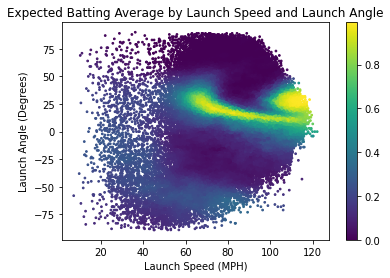

In [197]:
plt.scatter(df['launch_speed'], df['launch_angle'], c=df['estimated_ba_using_speedangle'], s = 3)
plt.colorbar()
plt.title("Expected Batting Average by Launch Speed and Launch Angle")
plt.xlabel("Launch Speed (MPH)")
plt.ylabel("Launch Angle (Degrees)")

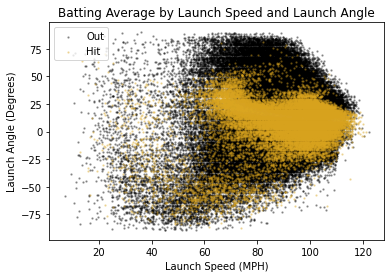

In [198]:
hit = df[df['babip_value'] == 1]
out = df[df['babip_value'] == 0]
plt.scatter(out['launch_speed'], out['launch_angle'], label = "Out", alpha = 0.3, color = "black", s=2)
plt.scatter(hit['launch_speed'], hit['launch_angle'], label = "Hit", alpha = 0.3, color = "goldenrod", s = 2)
plt.title("Batting Average by Launch Speed and Launch Angle")
plt.xlabel("Launch Speed (MPH)")
plt.ylabel("Launch Angle (Degrees)")
plt.legend(loc="upper left");

In [199]:
df['BA_expected'] = df['babip_value'] - df['estimated_ba_using_speedangle']

# Group by each team
df.groupby('hitter_team')['BA_expected'].mean().sort_values(ascending = False)

hitter_team
ARI   -0.026502
COL   -0.030143
MIA   -0.031314
PIT   -0.032196
KC    -0.033456
CWS   -0.033963
DET   -0.039132
TB    -0.039137
WSH   -0.039310
TEX   -0.041170
HOU   -0.041556
CHC   -0.043622
BOS   -0.044333
NYM   -0.044499
LAA   -0.044844
BAL   -0.044938
PHI   -0.047046
MIL   -0.047331
SD    -0.047680
CIN   -0.048318
STL   -0.049083
SF    -0.049372
TOR   -0.050989
CLE   -0.052893
LAD   -0.054505
OAK   -0.056741
SEA   -0.057280
NYY   -0.064579
ATL   -0.064742
MIN   -0.069466
Name: BA_expected, dtype: float64